# Init
- - -

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns #Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지, 약간 요소들간의 연관성을 비교하고자 할때 편리한듯?
import matplotlib.pyplot as plt
%matplotlib inline  
# %matplotlib inline 의 역할은 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것



#sklearn pipline & stack 용 라이브러리 

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.cross_decomposition import PLSRegression as  PLS
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


import warnings

<br/>

# 데이터 분석
- - -

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Dacon/abalone_age_estimate/train.csv')
label = train['Target']
train.drop(['id'], axis=1, inplace=True)


test = pd.read_csv('/content/drive/MyDrive/Dacon/abalone_age_estimate/test.csv')
test.drop(['id'], axis=1, inplace=True)

In [3]:
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [4]:
print("train shape : ",train.shape)
print("label shape : ",label.shape)
print("test shape : ",test.shape)
print()
print("---------------[ Train Info ]--------------- ")
print(train.info())
print("---------------[ Test Info ]--------------- ")
print(test.info())

train shape :  (1253, 9)
label shape :  (1253,)
test shape :  (2924, 8)

---------------[ Train Info ]--------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          1253 non-null   object 
 1   Lenght          1253 non-null   float64
 2   Diameter        1253 non-null   float64
 3   Height          1253 non-null   float64
 4   Whole Weight    1253 non-null   float64
 5   Shucked Weight  1253 non-null   float64
 6   Viscra Weight   1253 non-null   float64
 7   Shell Weight    1253 non-null   float64
 8   Target          1253 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 88.2+ KB
None
---------------[ Test Info ]--------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------     

In [5]:
print("-------------[ Train NULL Info ]------------- ")
print(train.isnull().sum())
print("--------------[ Test NULL Info ]------------- ")
print(test.isnull().sum())

-------------[ Train NULL Info ]------------- 
Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
Target            0
dtype: int64
--------------[ Test NULL Info ]------------- 
Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
dtype: int64


Index(['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')


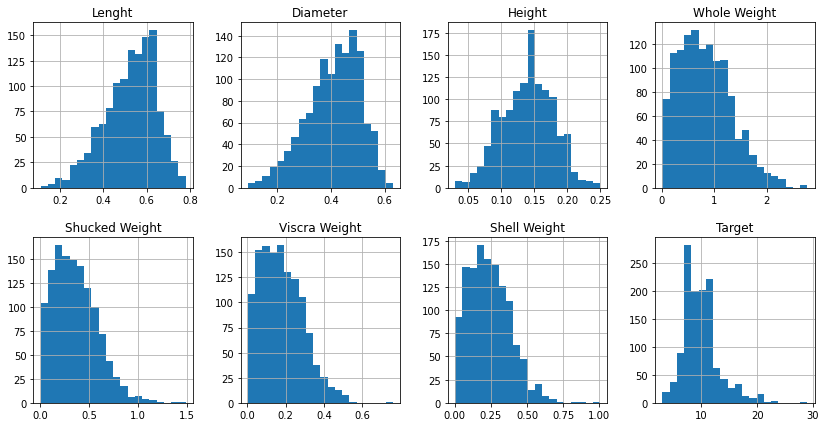

In [6]:
plot_cols_list = train.columns[1:]
print(plot_cols_list)

train[plot_cols_list].hist(figsize=(14,7), grid = True, layout = (2,4), bins = 20)
plt.show()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
Lenght,1.000000,0.987293,0.901911,0.926321,0.896337,0.903732,0.895664,0.543789
Diameter,0.987293,1.000000,0.908348,0.927205,0.891183,0.901029,0.904546,0.567933
Height,0.901911,0.908348,1.000000,0.895409,0.837456,0.868192,0.902180,0.604654
Whole Weight,0.926321,0.927205,0.895409,1.000000,0.968007,0.966942,0.951652,0.538404
Shucked Weight,0.896337,0.891183,0.837456,0.968007,1.000000,0.932138,0.870453,0.420126
Viscra Weight,0.903732,0.901029,0.868192,0.966942,0.932138,1.000000,0.905061,0.497283
Shell Weight,0.895664,0.904546,0.902180,0.951652,0.870453,0.905061,1.000000,0.625819
Target,0.543789,0.567933,0.604654,0.538404,0.420126,0.497283,0.625819,1.000000


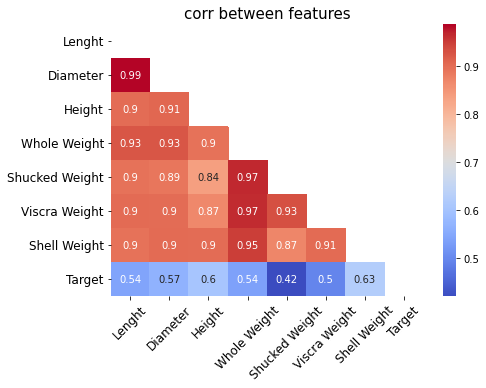

In [7]:
def corr_heat(df):
    plt.figure(figsize=(7,5))

    corr_df = df.corr()
    display(corr_df)

    mask = np.zeros_like(corr_df)
    mask[np.triu_indices_from(mask)] = 1
    heat_map = sns.heatmap(corr_df, annot=True, mask = mask, cmap='coolwarm')
    heat_map.set_xticklabels(heat_map.get_xticklabels(), fontsize=12, rotation=45)
    heat_map.set_yticklabels(heat_map.get_yticklabels(), fontsize=12)
    plt.title('corr between features', fontsize=15)
    plt.show()
    
corr_heat(train[plot_cols_list])

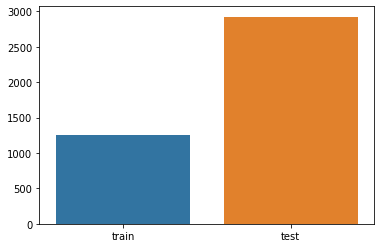

In [8]:
x = ["train", "test"]
y = [train.shape[0], test.shape[0]]
ax = sns.barplot(x=x, y=y)

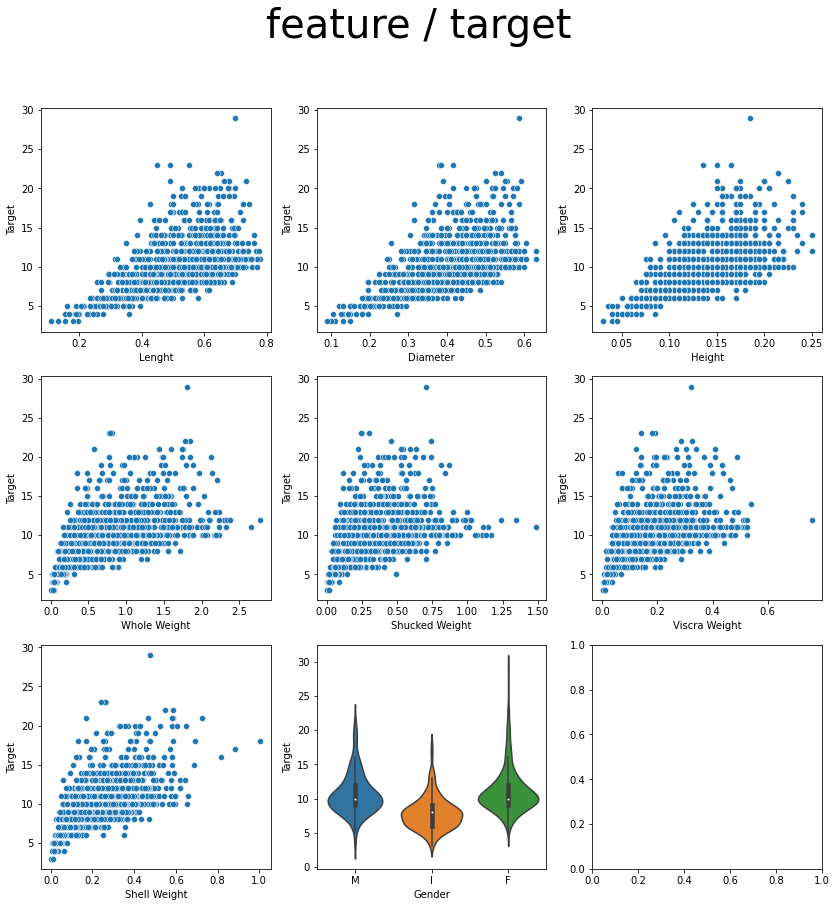

In [10]:
fig, ax = plt.subplots(3, 3, figsize = (14, 14))

plt.suptitle("feature / target", fontsize=40)

feature = ["Lenght", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscra Weight", "Shell Weight", "Gender"]

xvalue = 0
yvalue = 0

for xstr in feature:
    if xstr == "Gender":
        sns.violinplot(x = xstr, y = 'Target', data = train, ax = (ax[yvalue][xvalue]))
    else:
        sns.scatterplot(x = xstr, y = 'Target', data = train, ax = (ax[yvalue][xvalue]))
        
    if xvalue == 2:
        xvalue = 0
        yvalue += 1
    else:
        xvalue += 1

<br/>

# 데이터 전처리
- - -

## 이상치 제거

In [ ]:
# 이상치 인데스 확인
train[train["Target"]>20]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
216,M,0.675,0.555,0.200,1.4385,0.5450,0.2665,0.465,21
448,F,0.680,0.550,0.200,1.5960,0.5250,0.4075,0.585,21
553,F,0.450,0.380,0.165,0.8165,0.2500,0.1915,0.265,23
629,M,0.655,0.540,0.215,1.8440,0.7425,0.3270,0.585,22
735,F,0.640,0.525,0.215,1.7790,0.4535,0.2855,0.550,22
762,F,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
792,M,0.735,0.590,0.225,1.7560,0.6370,0.3405,0.580,21
1131,F,0.550,0.415,0.135,0.7750,0.3020,0.1790,0.260,23
1140,M,0.490,0.390,0.150,0.5730,0.2250,0.1240,0.170,21
1172,F,0.665,0.500,0.175,1.7420,0.5950,0.3025,0.725,21


In [ ]:
# 이상치 제거
train = train.drop(index = [762], axis = 0)
label = label.drop(index = [762], axis = 0)

In [ ]:
# 전복 전체무게가 전복 무게 + 껍질 무게 보다 작은 경우는 이상치라 판단되기 때문에 제거
train[train["Whole Weight"] < train["Shucked Weight"] + train["Shell Weight"]]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
47,I,0.380,0.275,0.095,0.1375,0.0860,0.0585,0.0605,7
382,I,0.455,0.330,0.100,0.3720,0.3580,0.0775,0.1100,8
435,I,0.475,0.365,0.100,0.1315,0.2025,0.0875,0.1230,7
847,I,0.230,0.165,0.060,0.0515,0.0190,0.0145,0.0360,4
1078,I,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315,5


In [ ]:
train = train.drop(index = [47, 382, 435, 847, 1078], axis = 0)
label = label.drop(index = [47, 382, 435, 847, 1078], axis = 0)

In [ ]:
# 전복 내장의 무게가 전복의 무게보다 큰경우는 이상치라 판단되기 때문에 제거
train[train["Shucked Weight"]<train["Viscra Weight"]]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
465,M,0.415,0.315,0.125,0.388,0.068,0.09,0.125,12


In [ ]:
train = train.drop(index = [465],axis=0)
label = label.drop(index = [465],axis=0)

## 데이터 전처리

In [ ]:
train = pd.get_dummies(train,columns=['Gender'])
test = pd.get_dummies(test,columns=['Gender'])

In [ ]:
# #성별 값 매핑
# train['Gender'] = train['Gender'].map( {'M': 2, 'F': 1, 'I':0} ).astype(int)
# test['Gender'] = test['Gender'].map( {'M': 2, 'F': 1, 'I':0} ).astype(int)

In [ ]:
# train['Gender'] = train['Gender'] / 2
# test['Gender'] = test['Gender'] / 2

In [ ]:
train.drop(['Target'], axis=1, inplace=True)

print(train.columns.values)

['Lenght' 'Diameter' 'Height' 'Whole Weight' 'Shucked Weight'
 'Viscra Weight' 'Shell Weight' 'Gender_F' 'Gender_I' 'Gender_M']


In [ ]:
train.head()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Gender_F,Gender_I,Gender_M
0,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,0,0,1
1,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,0,1,0
2,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,0,1,0
3,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,0,0,1
4,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,0,1,0


## 데이터 오버샘플링

In [ ]:
from imblearn.over_sampling import SMOTENC

# 모델설정
sm = SMOTENC(random_state=42,categorical_features=[0,1,2,3,4,5,6,7,8],k_neighbors=1)

print('Bfore OverSampling, the shape of train_X: {}'.format(train.shape))
print('Befor OverSampling, the shape of train_y: {} \n'.format(label.shape))

# train데이터를 넣어 복제함
train_re, label_re = sm.fit_resample(train,label)

print('After OverSampling, the shape of train_X: {}'.format(train_re.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(label_re.shape))

Bfore OverSampling, the shape of train_X: (1246, 10)
Befor OverSampling, the shape of train_y: (1246,) 

After OverSampling, the shape of train_X: (4242, 10)
After OverSampling, the shape of train_y: (4242,) 



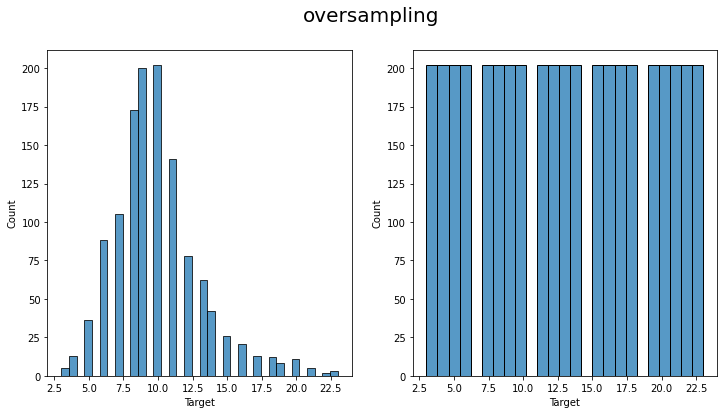

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

plt.suptitle("oversampling", fontsize=20)

sns.histplot(label,ax=ax[0])

sns.histplot(label_re,bins=25)

In [ ]:
draw = pd.concat([train_re,label_re],axis=1)

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Gender_F,Gender_I,Gender_M,Target
0,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,0,0,1,15
1,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,0,1,0,8
2,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,0,1,0,18
3,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,0,0,1,13
4,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,0,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...
4237,0.550,0.415,0.135,0.7750,0.3020,0.1790,0.2600,1,0,0,23
4238,0.450,0.380,0.165,0.8165,0.2500,0.1915,0.2650,1,0,0,23
4239,0.550,0.415,0.135,0.7750,0.3020,0.1790,0.2600,1,0,0,23
4240,0.550,0.415,0.135,0.7750,0.3020,0.1790,0.2600,1,0,0,23


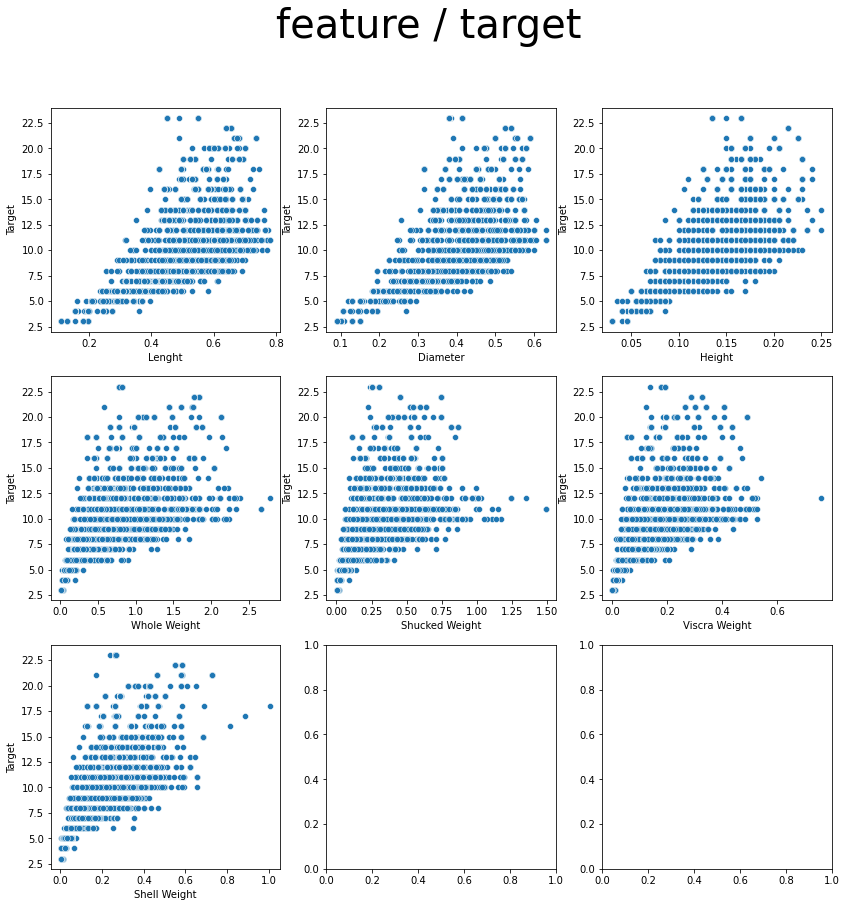

In [ ]:


fig, ax = plt.subplots(3, 3, figsize = (14, 14))

plt.suptitle("feature / target", fontsize=40)

feature = ["Lenght", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscra Weight", "Shell Weight", "Gender"]

xvalue = 0
yvalue = 0

for xstr in feature:
    if xstr == "Gender":
        # sns.violinplot(x = xstr, y = 'Target', data = train)
        continue
    else:
        sns.scatterplot(x = xstr, y = 'Target', data = draw, ax = (ax[yvalue][xvalue]))
        
    if xvalue == 2:
        xvalue = 0
        yvalue += 1
    else:
        xvalue += 1

<br/>

# 학습 데이터 만들기
- - -

In [ ]:
label_re = label_re / 29

In [ ]:
#data shuffle
from sklearn.utils import shuffle

train_re, label_re = shuffle(train_re, label_re, random_state = 1)

In [ ]:
n = round((len(train_re)*0.8))

x_train = train_re[:n]
y_train = label_re[:n]

x_val = train_re[n:]
y_val = label_re[n:]


train_re = train_re.values
label_re = label_re.values

x_train = x_train.values
y_train = y_train.values

x_val = x_val.values
y_val = y_val.values


In [ ]:
print(f'x_train shape => {x_train.shape}     y_train shape =>{y_train.shape}')
print(f'x_val shape => {x_val.shape}     y_val shape =>{y_val.shape}')
print(f'test shape => {test.shape}')

x_train shape => (3394, 10)     y_train shape =>(3394,)
x_val shape => (848, 10)     y_val shape =>(848,)
test shape => (2924, 10)


<br/>

# sklearn 모델 학습 pipeline을 통해서 알맞은 모델 및 파라미터 정하기
- - -

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.268e+01, tolerance: 1.473e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


finish


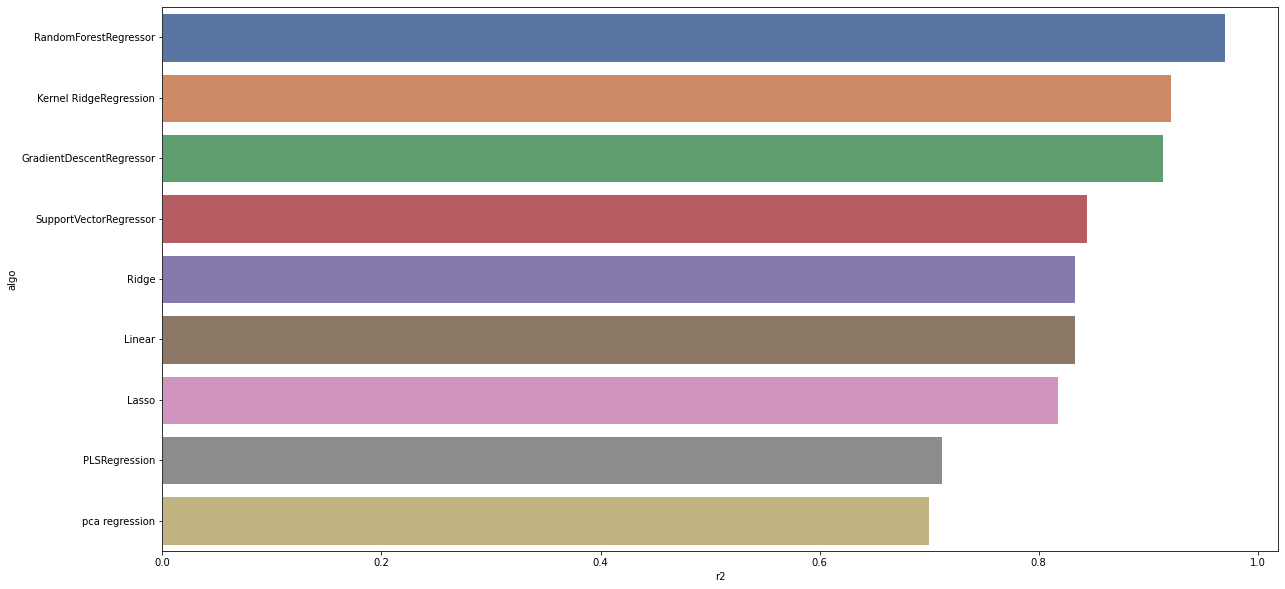

In [ ]:

cv = ShuffleSplit(n_splits=5 , test_size=0.1, random_state=42)
pipe_linear = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', LinearRegression())])
pipe_lasso = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Lasso(random_state = 42))])
pipe_ridge = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Ridge(random_state = 42))])
pipe_pca = Pipeline([
                ('scl', StandardScaler()),
                ('pca', PCA()),
                 ('fit', Ridge(random_state = 42))])
pipe_pls = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', PLS())])
pipe_gbr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', GBR())])
pipe_rfr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', RFR())])
pipe_svr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', SVR())])

pipe_KR = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', KernelRidge())])
                 
                 
### 

grid_params_linear = [{
    "poly__degree" : np.arange(1,3), 
    "fit__fit_intercept" : [True, False], 
}]
grid_params_lasso = [{
    "poly__degree" : np.arange(1,3),
    "fit__tol" : np.logspace(-5,0,10) ,
    "fit__alpha" : np.logspace(-5,1,10) ,     
                     }]
grid_params_pca = [{
    "pca__n_components" : np.arange(2,8)
}]
grid_params_ridge = [{
    "poly__degree" : np.arange(1,3),
    "fit__alpha" : np.linspace(0,5,10) ,
    "fit__solver" : [ "cholesky","lsqr","sparse_cg"] ,
    "fit__tol" : np.logspace(-5,0,10) ,
                     }]
grid_params_pls = [{
    "fit__n_components" : np.arange(2,8)
}]
min_samples_split_range = [0.5, 0.7 , 0.9]

grid_params_gbr =[{
    "fit__max_features" : ["sqrt","log2"] ,
    "fit__loss" : ["ls","lad","huber","quantile"] , 
    "fit__max_depth" : [5,6,7,8,9,10,11] ,
    "fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_rfr =[{
    "fit__max_features" : ["sqrt","log2"] , 
    "fit__max_depth" : [5,6,7,8,9,10,11,12] ,
    #"fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_svr =[{
    "fit__kernel" : ["rbf", "linear"] ,
    "fit__degree" : [2, 3, 5] , 
    "fit__gamma" : np.logspace(-5,1,10) ,
}]
grid_params_KR =[{
    "fit__kernel" : ["rbf","linear"] , 
    "fit__gamma" : np.logspace(-5,1,10) ,
}]
pipe = [
    pipe_linear , pipe_lasso ,  pipe_pca ,
    pipe_ridge , pipe_pls , pipe_gbr , 
    pipe_rfr , pipe_svr , pipe_KR 
]

params = [
    grid_params_linear , grid_params_lasso , grid_params_pca,
    grid_params_ridge , grid_params_pls , grid_params_gbr ,
    grid_params_rfr , grid_params_svr , grid_params_KR
]

jobs = 20

grid_dict = {
    0: 'Linear', 
    1: 'Lasso', 
    2: 'pca regression' , 
    3: 'Ridge' ,
    4: 'PLSRegression',
    5: "GradientDescentRegressor" ,
    6: "RandomForestRegressor" ,
    7: "SupportVectorRegressor" ,
    8: "Kernel RidgeRegression"
            }

model_mse = {}
model_r2 = {}
model_best_params = {}

for idx , (param , model) in enumerate(zip(params , pipe)) :
    search = GridSearchCV(model, param , scoring  = "neg_mean_squared_error" , 
                          cv=cv , n_jobs=jobs , verbose=-1 )
    search.fit(x_train , y_train)
    y_pred = search.predict(x_val)
    model_mse[grid_dict.get(idx)] = mse(y_val, y_pred)  
    model_r2[grid_dict.get(idx)] = r2(y_val, y_pred)  
    model_best_params[grid_dict.get(idx)] = search.best_params_
print("finish")


fig ,ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 2)
output = pd.DataFrame([model_r2.keys() , model_r2.values()], index = ["algo","r2"]).T
output.sort_values(["r2"], ascending= False ,inplace=True)
ax = sns.barplot(y="algo", x="r2", data=output)
plt.show()


In [ ]:
model_mse , model_r2
model_best_params

{'GradientDescentRegressor': {'fit__loss': 'ls',
  'fit__max_depth': 10,
  'fit__max_features': 'log2',
  'fit__min_samples_split': 0.5},
 'Kernel RidgeRegression': {'fit__gamma': 2.154434690031882,
  'fit__kernel': 'rbf'},
 'Lasso': {'fit__alpha': 1e-05, 'fit__tol': 1e-05, 'poly__degree': 2},
 'Linear': {'fit__fit_intercept': True, 'poly__degree': 2},
 'PLSRegression': {'fit__n_components': 7},
 'RandomForestRegressor': {'fit__max_depth': 12, 'fit__max_features': 'sqrt'},
 'Ridge': {'fit__alpha': 0.0,
  'fit__solver': 'sparse_cg',
  'fit__tol': 1e-05,
  'poly__degree': 2},
 'SupportVectorRegressor': {'fit__degree': 2,
  'fit__gamma': 0.46415888336127725,
  'fit__kernel': 'rbf'},
 'pca regression': {'pca__n_components': 6}}

In [ ]:
# 2차원 데이터 만들기
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.fit_transform(x_val)
test_poly = poly.fit_transform(test)
train_poly = poly.fit_transform(train)


# 제출용
model1 = RFR(max_depth=12, max_features = 'sqrt').fit(train_re,label_re )


In [ ]:
p1_test =[]
p1_test_tmp = model1.predict(x_val)
rmse_test = np.sqrt(np.mean(np.power(p1_test_tmp.reshape(-1, ) - y_val, 2)))
print(f'model1 RMSE Test = {rmse_test}')

p1_test = p1_test_tmp


model1 RMSE Test = 0.03603300373844436


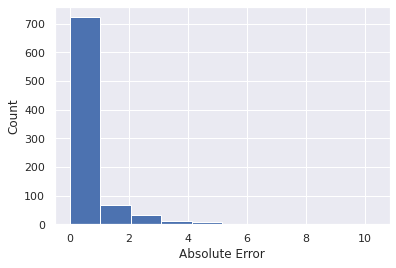

In [ ]:
# 오차정도histogram
plt.hist(np.abs(p1_test.reshape(-1) - y_val)*29)
plt.xlabel('Absolute Error')
plt.ylabel('Count')



plt.show()

In [ ]:
y1_test = model1.predict(test)

y1_test = y1_test*29

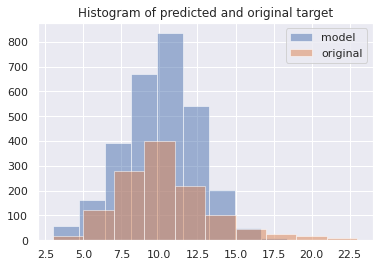

In [ ]:
# histogram of scaled target
label_fix = label
plt.hist(y1_test, bins=10, label='model', alpha=0.5)
plt.hist(label_fix, bins=10, label='original', alpha=0.5)

plt.title('Histogram of predicted and original target')

plt.legend()

plt.show()

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/Dacon/abalone_age_estimate/sample_submission.csv')
submission['Target'] = y1_test
submission.to_csv('oversampling_RFR.csv', index=False)


In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.fit_transform(x_val)
test_poly = poly.fit_transform(test)
train_poly = poly.fit_transform(train)

# 개별 모델 정의
model_RFR = RFR(max_depth=12, max_features = 'sqrt')
model_GDR = GBR(loss='ls',max_depth=10,max_features='log2',min_samples_split=0.5 )
model_SVR = SVR(degree = 2,gamma=0.46415888336127725, kernel = 'rbf')
model_KR = KernelRidge(gamma = 2.154434690031882, kernel = 'rbf' )


warnings.filterwarnings(action='ignore')

# 개별모델 내부에서 CV 적용해 Stacking하는 함수 구현
def get_stacking_datasets(model, x_train_n, y_train_n, x_test_n, n_folds):
  # CV하기 위해 K-fold 설정
  kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
  
  # 최종 메타 모델이 사용할 학습 데이터 반환을 위해서 넘파이 배열을 0으로 만들어서 초기화
  train_fold_pred = np.zeros((x_train_n.shape[0], 1)) # 2차원으로
  test_pred = np.zeros((x_test_n.shape[0], n_folds))
  print(model.__class__.__name__, '모델 시작')
  
  for folder_counter, (train_idx, valid_idx) in enumerate(kf.split(x_train_n)):
    # 개별 모델 내부에서 학습하고 1개의 fold로 예측할 데이터 셋 추출
    print(f" Fold 횟수 : {folder_counter+1}")
    x_tr = x_train_n[train_idx]
    y_tr = y_train_n[train_idx]
    x_te = x_train_n[valid_idx]
    
    # 개별 모델이 학습한 후 1개의 fold데이터셋으로 예측값 반환 후 최종 메타모델이 학습할 데이터셋에 첨가
    model.fit(x_tr, y_tr)
    train_fold_pred[valid_idx, :] = model.predict(x_te).reshape(-1,1)
    # 개별 모델이 원본 데이터셋의 검증 데이터셋을 기반으로 예측 결과값 반환 후 최종 메타모델이 검증할 데이터셋에 첨가
    test_pred[:, folder_counter] = model.predict(x_test_n)
  
  # 개별모델안에서 테스트 데이터셋을 기반으로 예측한 결과값들 mean취해주고 2차원으로 바꾸어주기
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
  
  return train_fold_pred, test_pred_mean

model_1_train, model_1_test = get_stacking_datasets(model_RFR, x_train, y_train, x_val, 10)
model_2_train, model_2_test = get_stacking_datasets(model_GDR, x_train, y_train, x_val, 10)
model_3_train, model_3_test = get_stacking_datasets(model_SVR, x_train, y_train, x_val, 10)
model_4_train, model_4_test = get_stacking_datasets(model_KR, x_train, y_train, x_val, 10)

RandomForestRegressor 모델 시작
 Fold 횟수 : 1
 Fold 횟수 : 2
 Fold 횟수 : 3
 Fold 횟수 : 4
 Fold 횟수 : 5
 Fold 횟수 : 6
 Fold 횟수 : 7
 Fold 횟수 : 8
 Fold 횟수 : 9
 Fold 횟수 : 10
GradientBoostingRegressor 모델 시작
 Fold 횟수 : 1
 Fold 횟수 : 2
 Fold 횟수 : 3
 Fold 횟수 : 4
 Fold 횟수 : 5
 Fold 횟수 : 6
 Fold 횟수 : 7
 Fold 횟수 : 8
 Fold 횟수 : 9
 Fold 횟수 : 10
SVR 모델 시작
 Fold 횟수 : 1
 Fold 횟수 : 2
 Fold 횟수 : 3
 Fold 횟수 : 4
 Fold 횟수 : 5
 Fold 횟수 : 6
 Fold 횟수 : 7
 Fold 횟수 : 8
 Fold 횟수 : 9
 Fold 횟수 : 10
KernelRidge 모델 시작
 Fold 횟수 : 1
 Fold 횟수 : 2
 Fold 횟수 : 3
 Fold 횟수 : 4
 Fold 횟수 : 5
 Fold 횟수 : 6
 Fold 횟수 : 7
 Fold 횟수 : 8
 Fold 횟수 : 9
 Fold 횟수 : 10


In [ ]:
# 개별모델이 생성한 학습/검증 데이터 최종 메타 모델이 학습/검증하도록 결합
stack_final_x_train = np.concatenate((model_1_train, model_2_train, model_3_train,model_4_train), axis=1)
stack_final_x_test = np.concatenate((model_1_test, model_2_test, model_3_test,model_4_test), axis=1)

finish


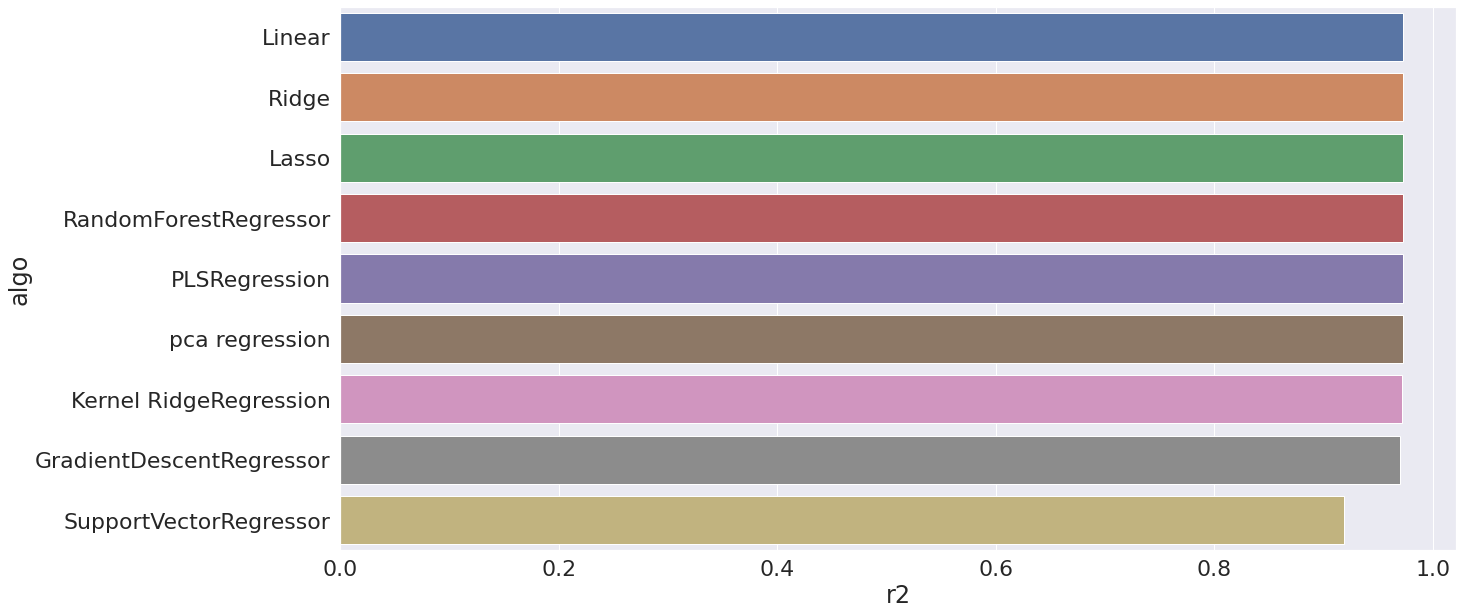

In [ ]:
cv = ShuffleSplit(n_splits=5 , test_size=0.1, random_state=42)

pipe_linear = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', LinearRegression())])
pipe_lasso = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Lasso(random_state = 42))])
pipe_ridge = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Ridge(random_state = 42))])
pipe_pca = Pipeline([
                ('scl', StandardScaler()),
                ('pca', PCA()),
                 ('fit', Ridge(random_state = 42))])
pipe_pls = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', PLS())])
pipe_gbr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', GBR())])
pipe_rfr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', RFR())])
pipe_svr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', SVR())])

pipe_KR = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', KernelRidge())])
                 
                 
### 

grid_params_linear = [{
    "poly__degree" : np.arange(1,3), 
    "fit__fit_intercept" : [True, False], 
}]
grid_params_lasso = [{
    "poly__degree" : np.arange(1,3),
    "fit__tol" : np.logspace(-5,0,10) ,
    "fit__alpha" : np.logspace(-5,1,10) ,     
                     }]
grid_params_pca = [{
    "pca__n_components" : np.arange(2,8)
}]
grid_params_ridge = [{
    "poly__degree" : np.arange(1,3),
    "fit__alpha" : np.linspace(0,5,10) ,
    "fit__solver" : [ "cholesky","lsqr","sparse_cg"] ,
    "fit__tol" : np.logspace(-5,0,10) ,
                     }]
grid_params_pls = [{
    "fit__n_components" : np.arange(2,8)
}]
min_samples_split_range = [0.5, 0.7 , 0.9]

grid_params_gbr =[{
    "fit__max_features" : ["sqrt","log2"] ,
    "fit__loss" : ["ls","lad","huber","quantile"] , 
    "fit__max_depth" : [5,6,7,8,9,10,11] ,
    "fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_rfr =[{
    "fit__max_features" : ["sqrt","log2"] , 
    "fit__max_depth" : [5,6,7,8,9,10,11,12] ,
    #"fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_svr =[{
    "fit__kernel" : ["rbf", "linear"] ,
    "fit__degree" : [2, 3, 5] , 
    "fit__gamma" : np.logspace(-5,1,10) ,
}]
grid_params_KR =[{
    "fit__kernel" : ["rbf","linear"] , 
    "fit__gamma" : np.logspace(-5,1,10) ,
}]
pipe = [
    pipe_linear , pipe_lasso ,  pipe_pca ,
    pipe_ridge , pipe_pls , pipe_gbr , 
    pipe_rfr , pipe_svr , pipe_KR 
]

params = [
    grid_params_linear , grid_params_lasso , grid_params_pca,
    grid_params_ridge , grid_params_pls , grid_params_gbr ,
    grid_params_rfr , grid_params_svr , grid_params_KR
]

jobs = 20

grid_dict = {
    0: 'Linear', 
    1: 'Lasso', 
    2: 'pca regression' , 
    3: 'Ridge' ,
    4: 'PLSRegression',
    5: "GradientDescentRegressor" ,
    6: "RandomForestRegressor" ,
    7: "SupportVectorRegressor" ,
    8: "Kernel RidgeRegression"
            }

model_mse = {}
model_r2 = {}
model_best_params = {}

for idx , (param , model) in enumerate(zip(params , pipe)) :
    search = GridSearchCV(model, param , scoring  = "neg_mean_squared_error" , 
                          cv=cv , n_jobs=jobs , verbose=-1 )
    search.fit(stack_final_x_train , y_train)
    y_pred = search.predict(stack_final_x_test)
    model_mse[grid_dict.get(idx)] = mse(y_val, y_pred)  
    model_r2[grid_dict.get(idx)] = r2(y_val, y_pred)  
    model_best_params[grid_dict.get(idx)] = search.best_params_
print("finish")


fig ,ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 2)
output = pd.DataFrame([model_r2.keys() , model_r2.values()], index = ["algo","r2"]).T
output.sort_values(["r2"], ascending= False ,inplace=True)
ax = sns.barplot(y="algo", x="r2", data=output)
plt.show()


In [ ]:
model_mse , model_r2
model_best_params

{'GradientDescentRegressor': {'fit__loss': 'ls',
  'fit__max_depth': 9,
  'fit__max_features': 'log2',
  'fit__min_samples_split': 0.5},
 'Kernel RidgeRegression': {'fit__gamma': 0.1, 'fit__kernel': 'rbf'},
 'Lasso': {'fit__alpha': 4.641588833612782e-05,
  'fit__tol': 0.005994842503189409,
  'poly__degree': 2},
 'Linear': {'fit__fit_intercept': True, 'poly__degree': 2},
 'PLSRegression': {'fit__n_components': 3},
 'RandomForestRegressor': {'fit__max_depth': 12, 'fit__max_features': 'sqrt'},
 'Ridge': {'fit__alpha': 2.7777777777777777,
  'fit__solver': 'sparse_cg',
  'fit__tol': 0.0004641588833612782,
  'poly__degree': 2},
 'SupportVectorRegressor': {'fit__degree': 2,
  'fit__gamma': 1e-05,
  'fit__kernel': 'linear'},
 'pca regression': {'pca__n_components': 4}}

In [ ]:
#최종 제출 모델 만들기
from sklearn.linear_model import LogisticRegression

poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.fit_transform(x_val)
test_poly = poly.fit_transform(test)
train_poly = poly.fit_transform(train)

# 개별 모델 정의
model_RFR = RFR(max_depth=12, max_features = 'sqrt')
model_GDR = GBR(loss='ls',max_depth=10,max_features='log2',min_samples_split=0.5 )
model_SVR = SVR(degree = 2,gamma=0.46415888336127725, kernel = 'rbf')
model_KR = KernelRidge(gamma = 2.154434690031882, kernel = 'rbf' )



from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings(action='ignore')

# 개별모델 내부에서 CV 적용해 Stacking하는 함수 구현
def get_stacking_datasets(model, x_train_n, y_train_n, x_test_n, n_folds):
  # CV하기 위해 K-fold 설정
  kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
  
  # 최종 메타 모델이 사용할 학습 데이터 반환을 위해서 넘파이 배열을 0으로 만들어서 초기화
  train_fold_pred = np.zeros((x_train_n.shape[0], 1)) # 2차원으로
  test_pred = np.zeros((x_test_n.shape[0], n_folds))
  print(model.__class__.__name__, '모델 시작')
  
  for folder_counter, (train_idx, valid_idx) in enumerate(kf.split(x_train_n)):
    # 개별 모델 내부에서 학습하고 1개의 fold로 예측할 데이터 셋 추출
    print(f" Fold 횟수 : {folder_counter+1}")
    x_tr = x_train_n[train_idx]
    y_tr = y_train_n[train_idx]
    x_te = x_train_n[valid_idx]
    
    # 개별 모델이 학습한 후 1개의 fold데이터셋으로 예측값 반환 후 최종 메타모델이 학습할 데이터셋에 첨가
    model.fit(x_tr, y_tr)
    train_fold_pred[valid_idx, :] = model.predict(x_te).reshape(-1,1)
    # 개별 모델이 원본 데이터셋의 검증 데이터셋을 기반으로 예측 결과값 반환 후 최종 메타모델이 검증할 데이터셋에 첨가
    test_pred[:, folder_counter] = model.predict(x_test_n)
  
  # 개별모델안에서 테스트 데이터셋을 기반으로 예측한 결과값들 mean취해주고 2차원으로 바꾸어주기
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
  
  return train_fold_pred, test_pred_mean

model_1_train, model_1_test = get_stacking_datasets(model_RFR, train_re, label_re, test, 10)
model_2_train, model_2_test = get_stacking_datasets(model_GDR, train_re, label_re, test, 10)
model_3_train, model_3_test = get_stacking_datasets(model_SVR, train_re, label_re, test, 10)
model_4_train, model_4_test = get_stacking_datasets(model_KR, train_re, label_re, test, 10)

RandomForestRegressor 모델 시작
 Fold 횟수 : 1
 Fold 횟수 : 2
 Fold 횟수 : 3
 Fold 횟수 : 4
 Fold 횟수 : 5
 Fold 횟수 : 6
 Fold 횟수 : 7
 Fold 횟수 : 8
 Fold 횟수 : 9
 Fold 횟수 : 10
GradientBoostingRegressor 모델 시작
 Fold 횟수 : 1
 Fold 횟수 : 2
 Fold 횟수 : 3
 Fold 횟수 : 4
 Fold 횟수 : 5
 Fold 횟수 : 6
 Fold 횟수 : 7
 Fold 횟수 : 8
 Fold 횟수 : 9
 Fold 횟수 : 10
SVR 모델 시작
 Fold 횟수 : 1
 Fold 횟수 : 2
 Fold 횟수 : 3
 Fold 횟수 : 4
 Fold 횟수 : 5
 Fold 횟수 : 6
 Fold 횟수 : 7
 Fold 횟수 : 8
 Fold 횟수 : 9
 Fold 횟수 : 10
KernelRidge 모델 시작
 Fold 횟수 : 1
 Fold 횟수 : 2
 Fold 횟수 : 3
 Fold 횟수 : 4
 Fold 횟수 : 5
 Fold 횟수 : 6
 Fold 횟수 : 7
 Fold 횟수 : 8
 Fold 횟수 : 9
 Fold 횟수 : 10


In [ ]:
# 개별모델이 생성한 학습/검증 데이터 최종 메타 모델이 학습/검증하도록 결합
stack_final_x_train = np.concatenate((model_1_train, model_2_train, model_3_train,model_4_train), axis=1)
stack_final_x_test = np.concatenate((model_1_test, model_2_test, model_3_test,model_4_test), axis=1)

#2차원 전환
final_train_poly = poly.fit_transform(stack_final_x_train)
final_test_poly = poly.fit_transform(stack_final_x_test)

In [ ]:

# 최종 메타 모델 정의
#lr_final = Ridge(alpha=0.0,solver='sparse_cg', tol=0.021544346900318846)
#lr_final = LinearRegression(fit_intercept = True)
#lr_final = KernelRidge(gamma = 0.021544346900318822, kernel = 'rbf' )
#lr_final = Lasso(alpha = 0.001, tol = 0.07742636826811278)
lr_final = RFR(max_depth=8, max_features='sqrt' )



# 최종 메타모델로 학습
# 최종 메타모델 학습시 label은 원본 데이터의 label(y값)
lr_final.fit(stack_final_x_train, label_re)
#stack_final_pred = lr_final.predict(stack_final_x_test)

y_test = lr_final.predict(stack_final_x_test)


In [ ]:
y_test = y_test*29

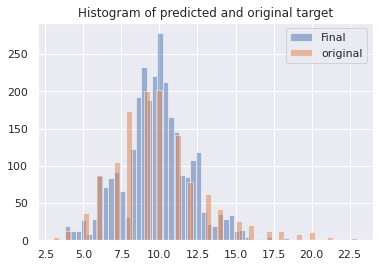

In [ ]:
sns.set(font_scale = 1)

# histogram of scaled target
label_fix = label
plt.hist(y_test, bins=50, label='Final', alpha=0.5)
plt.hist(label_fix, bins=50, label='original', alpha=0.5)
plt.title('Histogram of predicted and original target')
plt.legend()
plt.show()

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/Dacon/abalone_age_estimate/sample_submission.csv')
submission['Target'] = y_test
submission.to_csv('OverSampling_Stack_RFR[RFR,KRidge,SVR,GDR].csv', index=False)